In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
#Veri setinin yüklenmesi
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
## Görüntüleri normalize eder
x_train = x_train / 255.00
x_test = x_test / 255.00

In [6]:
#Veriyi CNN ile uyumlu hale getirme (CNN 4boyutlu veri ister (sayı,yükseklik,genişlik,kanal))
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [8]:
# Veri kümesi özetini görüntüleme
print('X_train = %s, Y_train = %s' % (x_train.shape, y_train.shape))
print('X_test = %s, Y_test = %s' % (x_test.shape, y_test.shape))

X_train = (60000, 28, 28, 1), Y_train = (60000,)
X_test = (10000, 28, 28, 1), Y_test = (10000,)


In [10]:
#Modeli oluşturma
network = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
    layers.Dense(10, activation='softmax')
])


In [11]:
#Model eğitimi
network.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = network.fit(x=x_train,y=y_train, epochs= 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.9194 - loss: 0.2566
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9863 - loss: 0.0444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9919 - loss: 0.0257
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9962 - loss: 0.0109
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9972 - loss: 0.0082
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9976 - loss: 0.0069
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9979 - loss: 0.0059
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9991 - loss: 0.0032
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9989 - loss: 0.0034


In [12]:
# Doğruluk oranı
network.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9833 - loss: 0.0700


[0.055123839527368546, 0.9864000082015991]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Gerçek sınıf: 1
Modelin tahmini: 1


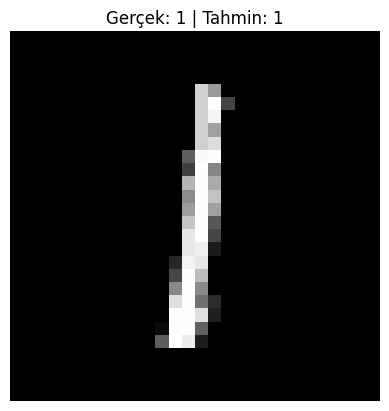

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Test verisinden rastgele bir örnek seçer
i = np.random.randint(0, len(x_test))
sample = x_test[i]
label = y_test[i]

# Modelin tahmini
prediction = network.predict(sample[np.newaxis, ...])
predicted_class = np.argmax(prediction)

print(f"Gerçek sınıf: {label}")
print(f"Modelin tahmini: {predicted_class}")

plt.imshow(sample.squeeze(), cmap='gray')
plt.title(f"Gerçek: {label} | Tahmin: {predicted_class}")
plt.axis('off')
plt.show()
